# Cosmic Ray Proton Spectrum Fitting

In [88]:
from pylab import *

## PAMELA data from Adriani et al., Science 332, 69 (2011)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Adriani et al., ApJ 765, 91 (2013)*

In [89]:
Z = 1
data_PAMELA_H = np.genfromtxt("Data/PAMELA_H_data.txt")
R_PAMELA = data_PAMELA_H[:,1]
E_PAMELA = R_PAMELA * Z
flux_R_PAMELA = data_PAMELA_H[:,3]
flux_PAMELA = flux_R_PAMELA / Z

## AMS02 data from Aguilar et al., PRL 114, 171103 (2015)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Aguilar et al., PhR 894, 1 (2021)*

In [90]:
Z = 1
data_AMS02_H = np.genfromtxt("Data/AMS02_H_data.txt")
R_AMS02 = data_AMS02_H[:,1]
E_AMS02 = R_AMS02 * Z
flux_R_AMS02 = data_AMS02_H[:,3]
flux_AMS02 = flux_R_AMS02 / Z

## DAMPE data from An et al., SciA 5, eaax3793 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [91]:
data_DAMPE_H = np.genfromtxt("Data/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]

## CALET data from Adriani et al., PhRvL 122, 181102 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Adriani et al., PhRvL 129, 101102 (2022)*

In [92]:
Z = 1
data_CALET_H = np.genfromtxt("Data/CALET_H_data.txt")
R_CALET = data_CALET_H[:,1]
E_CALET = R_CALET * Z
flux_R_CALET = data_CALET_H[:,3]
flux_CALET = flux_R_CALET / Z

## CREAM data from Yoon et al., ApJ 839, 5 (2017)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Ek/n>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek/n bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [93]:
n = 1
data_CREAM_H = np.genfromtxt("Data/CREAM_H_data.txt")
E_CREAM = data_CREAM_H[:,1] * n
flux_CREAM = data_CREAM_H[:,3]

## ATIC data from Panov et al., Bull. Russian Acad. Sci. 73, 564 (2009)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [94]:
data_ATIC_H = np.genfromtxt("Data/ATIC_H_data.txt")
E_ATIC = data_ATIC_H[:,1]
flux_ATIC = data_ATIC_H[:,3]

## NUCLEON data from Grebenyuk et al., AdSpR 64, 2546 (2019)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [95]:
data_NUCLEON_H = np.genfromtxt("Data/NUCLEON_H_data.txt")
E_NUCLEON = data_NUCLEON_H[:,1]
flux_NUCLEON = data_NUCLEON_H[:,3]

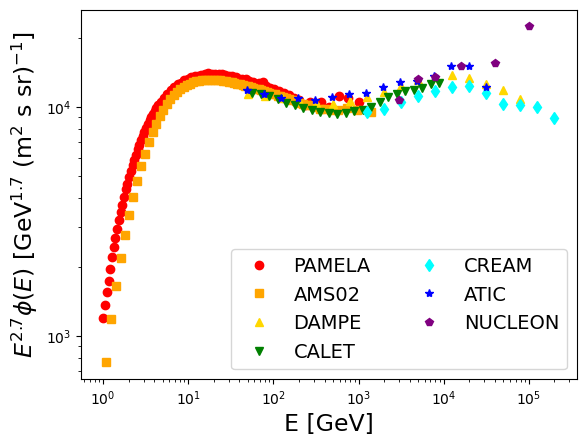

In [96]:
plt.plot(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, 'o', color='red', label='PAMELA')
plt.plot(E_AMS02, flux_AMS02 * E_AMS02**2.7, 's', color='orange', label='AMS02')
plt.plot(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, '^', color='gold', label='DAMPE')
plt.plot(E_CALET, flux_CALET * E_CALET**2.7, 'v', color='green', label='CALET')
plt.plot(E_CREAM, flux_CREAM * E_CREAM**2.7, 'd', color='cyan', label='CREAM')
plt.plot(E_ATIC, flux_ATIC * E_ATIC**2.7, '*', color='blue', label='ATIC')
plt.plot(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, 'p', color='purple', label='NUCLEON')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)